In [1]:
import cv2
import numpy as np
import glob
import random
import os

In [2]:
#pip install opencv-python

In [2]:
os.chdir(r"path to the directory where '.weights' and '.cfg' files are located...")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

image after reading with cv2 [[[185 182 174]
  [185 182 174]
  [185 182 174]
  ...
  [179 167 157]
  [179 167 157]
  [179 167 157]]

 [[185 182 174]
  [185 182 174]
  [186 183 175]
  ...
  [179 167 157]
  [179 167 157]
  [179 167 157]]

 [[186 183 175]
  [186 183 175]
  [187 184 176]
  ...
  [180 168 158]
  [180 168 158]
  [180 168 158]]

 ...

 [[ 39  41  41]
  [ 39  41  41]
  [ 39  41  41]
  ...
  [ 17  19  19]
  [ 17  19  19]
  [ 17  19  19]]

 [[ 39  39  39]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 14  17  15]
  [ 14  17  15]
  [ 14  17  15]]

 [[ 39  39  39]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 14  17  15]
  [ 14  17  15]
  [ 14  17  15]]]
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
class id is  1
[[ 1]
 [ 9]
 [10]
 [ 4]]


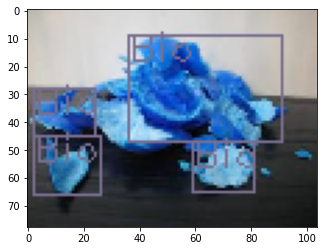

In [6]:
# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing - Copy.cfg")

# Name custom object
classes = ["NonBio","Bio"]

# Images path
#images_path = glob.glob(r"C:\Users\admin\Projects\Smart-Dustbin\Dataset Images\Non biodegradable waste\renamed\*.png")
img_path = r"path to image on which you want to test the model..." 

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
#random.shuffle(images_path)
# loop through all the images
#for img_path in images_path:
# Loading image
img = cv2.imread(img_path)
print("image after reading with cv2", img)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)
#print('outs are ',outs)
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            # Object detected
            print("class id is ",class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
        cv2.putText(img, label, (x, y+10), font, 1, color, 1)


plt.imshow(img)
    